# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| year_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [1]:
bcsc<-read.csv("./datos/BCSC_risk_factors_summarized.csv")
bcsc <- bcsc[rep(row.names(bcsc), bcsc$count), 1:(ncol(bcsc)-1)]
print(paste("El número de filas es:",nrow(bcsc)))

[1] "El número de filas es: 6318638"


El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [2]:
set.seed(12345)
bcsc <- bcsc[sample(1:nrow(bcsc),size=5000),]

In [4]:
head(bcsc)

year age_group_5_years race_eth first_degree_hx age_menarche
792997.89  2006 8                 9        9               9           
986739.194 2008 7                 2        0               9           
845393.799 2007 5                 1        0               9           
996805.11  2008 8                 1        1               1           
481428.71  2004 3                 1        0               9           
169906.1   2001 6                 5        0               9           
           age_first_birth BIRADS_breast_density current_hrt menopaus bmi_group
792997.89  9               2                     9           2        9        
986739.194 9               2                     0           2        9        
845393.799 9               2                     0           1        9        
996805.11  1               2                     0           2        2        
481428.71  9               3                     0           1        2        
169906.1   9               1                     1           2        3        
           biophx breast_cancer_history
792997.89  0      0                    
986739.194 0      0                    
845393.799 0      0                    
996805.11  0      0                    
481428.71  0      0                    
169906.1   0      0

In [5]:
summary(bcsc)

      year      age_group_5_years    race_eth     first_degree_hx
 Min.   :2000   Min.   : 1.000    Min.   :1.000   Min.   :0.000  
 1st Qu.:2002   1st Qu.: 5.000    1st Qu.:1.000   1st Qu.:0.000  
 Median :2004   Median : 7.000    Median :1.000   Median :0.000  
 Mean   :2004   Mean   : 6.923    Mean   :2.514   Mean   :1.028  
 3rd Qu.:2007   3rd Qu.: 9.000    3rd Qu.:3.000   3rd Qu.:0.000  
 Max.   :2009   Max.   :13.000    Max.   :9.000   Max.   :9.000  
  age_menarche   age_first_birth BIRADS_breast_density  current_hrt   
 Min.   :0.000   Min.   :0.000   Min.   :1.000         Min.   :0.000  
 1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.000         1st Qu.:0.000  
 Median :9.000   Median :9.000   Median :3.000         Median :0.000  
 Mean   :6.302   Mean   :5.917   Mean   :4.197         Mean   :1.879  
 3rd Qu.:9.000   3rd Qu.:9.000   3rd Qu.:9.000         3rd Qu.:1.000  
 Max.   :9.000   Max.   :9.000   Max.   :9.000         Max.   :9.000  
    menopaus       bmi_group         biop

Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

In [3]:
for (col in c("race_eth","first_degree_hx","age_menarche","age_first_birth","BIRADS_breast_density","current_hrt",
             "menopaus","bmi_group","biophx","breast_cancer_history")){
    bcsc[bcsc[,col]==9,col]<-NA
}

bcsc$age_factor<-factor(
    bcsc$age_group_5_years,
    labels=c("Age 18-29","Age 30-34","Age 35-39","Age 40-44","Age 45-49",
             "Age 50-54","Age 55-59","Age 60-64","Age 65-69","Age 70-74",
             "Age 75-79","Age 80-84","Age ≥85"))

bcsc$first_degree_hx<-factor(bcsc$first_degree_hx,
    labels=c("NO","SI"))

bcsc$race_eth<-factor(bcsc$race_eth,
    labels=c("Non-Hispanic white","Non-Hispanic black","Asian/Pacific Islander",
             "Native American","Hispanic","Other/mixed"))


bcsc$BIRADS_breast_density<-factor(bcsc$BIRADS_breast_density,
    labels=c("Almost entirely fat","Scattered fibroglandular densities",
             "Heterogeneously dense","Extremely dense"))

#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

In [4]:
bcsc$age[bcsc$age_group_5_years==1]<-24
bcsc$age[bcsc$age_group_5_years==2]<-32
bcsc$age[bcsc$age_group_5_years==3]<-37
bcsc$age[bcsc$age_group_5_years==4]<-42
bcsc$age[bcsc$age_group_5_years==5]<-47
bcsc$age[bcsc$age_group_5_years==6]<-52
bcsc$age[bcsc$age_group_5_years==7]<-57
bcsc$age[bcsc$age_group_5_years==8]<-62
bcsc$age[bcsc$age_group_5_years==9]<-67
bcsc$age[bcsc$age_group_5_years==10]<-72
bcsc$age[bcsc$age_group_5_years==11]<-77
bcsc$age[bcsc$age_group_5_years==12]<-82
bcsc$age[bcsc$age_group_5_years==13]<-87

In [5]:
head(bcsc)

year age_group_5_years race_eth           first_degree_hx
792997.89  2006 8                 NA                 NA             
986739.194 2008 7                 Non-Hispanic black NO             
845393.799 2007 5                 Non-Hispanic white NO             
996805.11  2008 8                 Non-Hispanic white SI             
481428.71  2004 3                 Non-Hispanic white NO             
169906.1   2001 6                 Hispanic           NO             
           age_menarche age_first_birth BIRADS_breast_density             
792997.89  NA           NA              Scattered fibroglandular densities
986739.194 NA           NA              Scattered fibroglandular densities
845393.799 NA           NA              Scattered fibroglandular densities
996805.11   1            1              Scattered fibroglandular densities
481428.71  NA           NA              Heterogeneously dense             
169906.1   NA           NA              Almost entirely fat               
           current_hrt menopaus bmi_group biophx breast_cancer_history
792997.89  NA          2        NA        0      0                    
986739.194  0          2        NA        0      0                    
845393.799  0          1        NA        0      0                    
996805.11   0          2         2        0      0                    
481428.71   0          1         2        0      0                    
169906.1    1          2         3        0      0                    
           age_factor age
792997.89  Age 60-64  62 
986739.194 Age 55-59  57 
845393.799 Age 45-49  47 
996805.11  Age 60-64  62 
481428.71  Age 35-39  37 
169906.1   Age 50-54  52

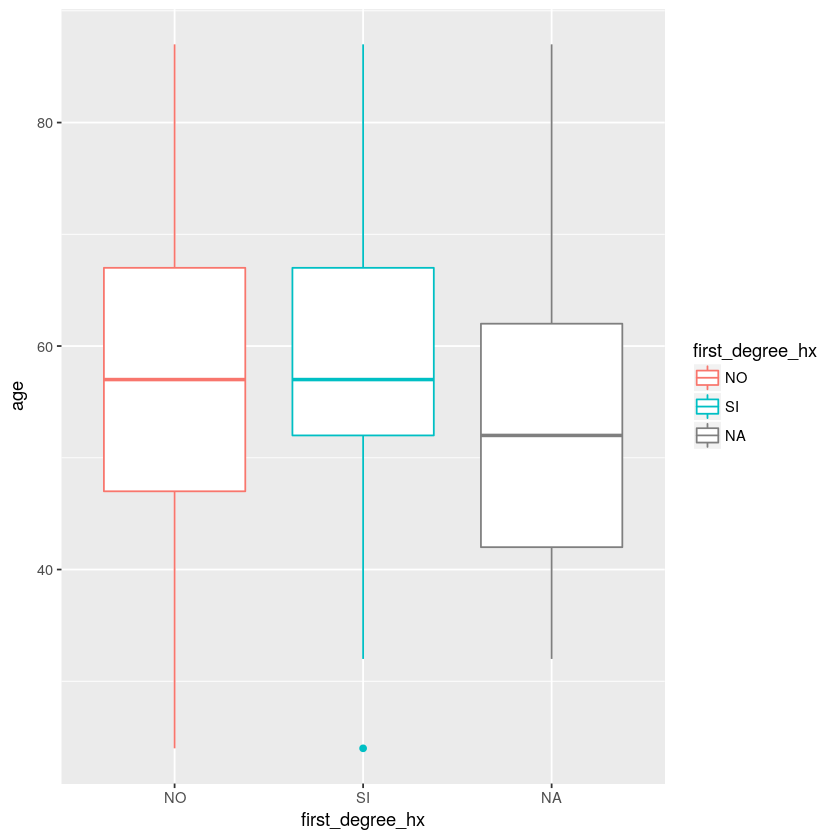

In [6]:
library(ggplot2)
ggplot(bcsc,aes(y=age,x=first_degree_hx,color=first_degree_hx))+geom_boxplot()

¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

In [7]:
for (v in levels(bcsc$first_degree_hx)){
    print(paste("Shapiro test variable:",v,"pvalue:",
                shapiro.test(bcsc$age[bcsc$first_degree_hx==v])$p.value))
}
print(paste("Bartlett test, pvalue:",
            bartlett.test(bcsc$age~bcsc$first_degree_hx)$p.value))
print("Aplicamos test Wilcox porque la edad no sigue una gaussiana")

wtest<-wilcox.test(age ~ first_degree_hx, data=bcsc)

print(paste0("La edad de aparición del cancer depende de los antecedentes familiares porque el pvalor es muy bajo:",
    round(wtest$p.value,8)))

[1] "Shapiro test variable: NO pvalue: 4.54082851719025e-31"
[1] "Shapiro test variable: SI pvalue: 4.48087454231314e-11"
[1] "Bartlett test, pvalue: 0.0951557975915569"
[1] "Aplicamos test Wilcox porque la edad no sigue una gaussiana"
[1] "La edad de aparición del cancer depende de los antecedentes familiares porque el pvalor es muy bajo:2.34e-06"


Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

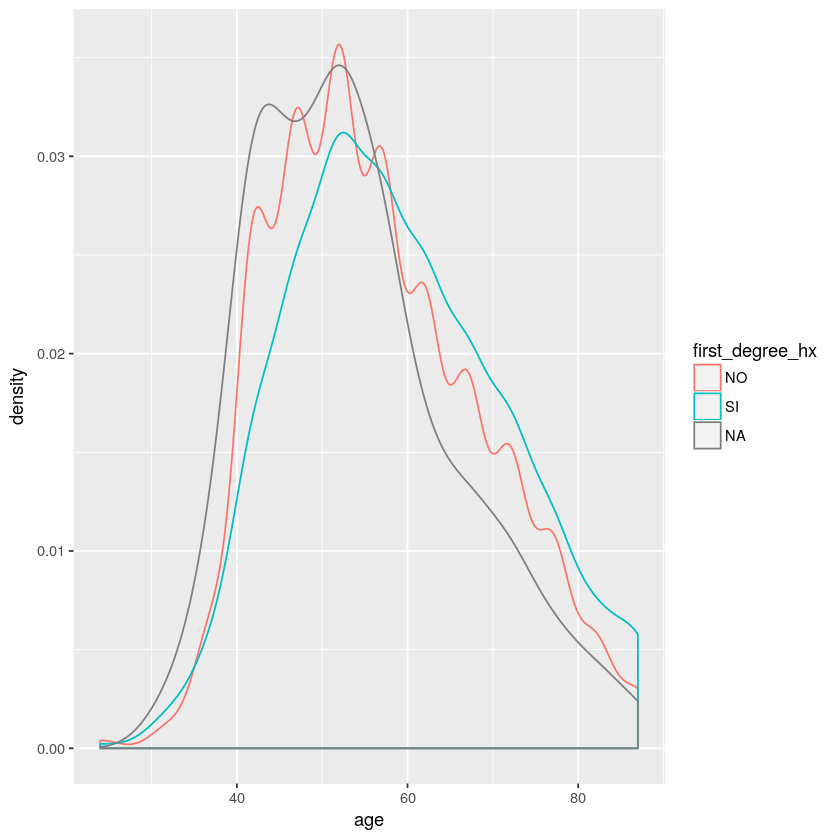

In [8]:
ggplot(bcsc,aes(x=age,color=first_degree_hx))+geom_density()

#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cancer en función de la densidad del cancder (BIRADS).

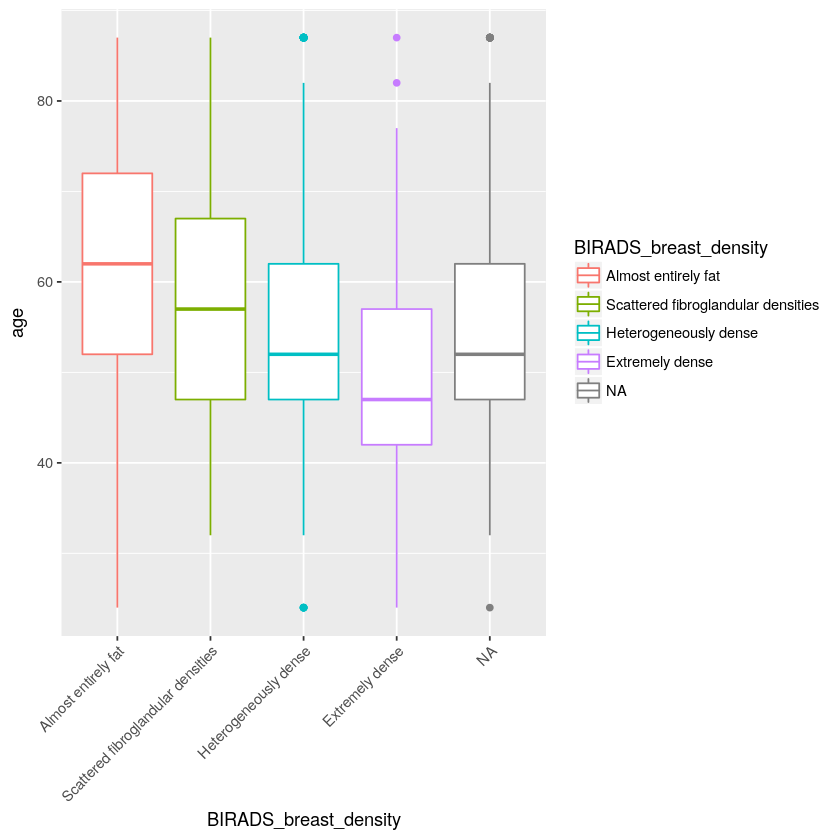

In [9]:

ggplot(bcsc,aes(y=age,x=BIRADS_breast_density,color=BIRADS_breast_density))+
    geom_boxplot()+ theme(axis.text.x = element_text(angle = 45, hjust = 1))

¿Existe una evidencia estadística significativa para decir que la edad en la que se detecta el cancer depende de la densidad del cancer (BIRADS)?

¿Que test habría que aplicar?

In [10]:
for (v in levels(bcsc$BIRADS_breast_density)){
    print(paste("variable:",v,"pvalue:",
                shapiro.test(bcsc$age[bcsc$BIRADS_breast_density==v])$p))    
}

kt<-kruskal.test(age ~ BIRADS_breast_density, data=bcsc)

print(paste("Según el test kruskal la el tipo de cancer (BIRADS)", 
"tiene una dependencia en la edad de aparición porque su p-valor es muy bajo:",
            kt$p.value))

[1] "variable: Almost entirely fat pvalue: 0.000151865852273701"
[1] "variable: Scattered fibroglandular densities pvalue: 4.7377089605984e-20"
[1] "variable: Heterogeneously dense pvalue: 1.2162989002878e-20"
[1] "variable: Extremely dense pvalue: 2.89718130439785e-09"
[1] "Según el test kruskal la el tipo de cancer (BIRADS) tiene una dependencia en la edad de aparición porque su p-valor es muy bajo: 1.21834204578165e-33"


#### Tablas de contingencia: BIRADS

¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

In [11]:
cqt<-chisq.test(table(bcsc$BIRADS_breast_density))

print("Está claro que no todos los BIRADS son igual de probables porque el p-valor es muy bajo:")
cqt

[1] "Está claro que no todos los BIRADS son igual de probables porque el p-valor es muy bajo:"



	Chi-squared test for given probabilities

data:  table(bcsc$BIRADS_breast_density)
X-squared = 1816.3, df = 3, p-value < 2.2e-16


¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?

In [12]:
sort(prop.table(table(bcsc$BIRADS_breast_density)),decreasing = T)[1]

Scattered fibroglandular densities 
                         0.4538021

¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

In [13]:
cqtest<-chisq.test(table(bcsc$BIRADS_breast_density,bcsc$first_degree_hx))
print(paste("El tipo de cancer (BIRADS) es completamente independiente",
             "de si ha habido o no antecedentes familiares"))
print(paste("Tenemos que aceptar la hipótesis nula (no hay relación entre ambos)",
             "porque el pvalor es muy alto:",cqtest$p.value))

[1] "El tipo de cancer (BIRADS) es completamente independiente de si ha habido o no antecedentes familiares"
[1] "Tenemos que aceptar la hipótesis nula (no hay relación entre ambos) porque el pvalor es muy alto: 0.235951995918296"


¿Depende el tipo de cancer BIRADS del grupo étnico?

In [14]:
#prop.table(table(bcsc$BIRADS_breast_density,bcsc$race_eth),margin = 2)

cqtest<-chisq.test(table(bcsc$BIRADS_breast_density,bcsc$race_eth),simulate.p.value = T)

print("El tipo de cancer (BIRADS) parece depender del grupo étnico del paciente")
print(paste("Tenemos que rechazar la hipótesis nula (no hay relación entre ambos)",
             "porque el pvalor es muy bajo:",cqtest$p.value))

[1] "El tipo de cancer (BIRADS) parece depender del grupo étnico del paciente"
[1] "Tenemos que rechazar la hipótesis nula (no hay relación entre ambos) porque el pvalor es muy bajo: 0.000499750124937531"


In [15]:
prop.table(table(bcsc$race_eth,bcsc$BIRADS_breast_density),margin = 1)

                        
                         Almost entirely fat Scattered fibroglandular densities
  Non-Hispanic white              0.07810107                         0.46248086
  Non-Hispanic black              0.10176991                         0.44247788
  Asian/Pacific Islander          0.06250000                         0.28977273
  Native American                 0.05882353                         0.41176471
  Hispanic                        0.11353712                         0.42794760
  Other/mixed                     0.05128205                         0.48717949
                        
                         Heterogeneously dense Extremely dense
  Non-Hispanic white                0.39088821      0.06852986
  Non-Hispanic black                0.40707965      0.04867257
  Asian/Pacific Islander            0.48295455      0.16477273
  Native American                   0.35294118      0.17647059
  Hispanic                          0.41048035      0.04803493
  Other/mixe

¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA

In [16]:
bcsc_native<-bcsc[as.character(bcsc$race_eth)=="Native American",
                  c("BIRADS_breast_density","race_eth")]
bcsc_native<-na.omit(bcsc_native)

ns<-sum(bcsc_native$BIRADS_breast_density=="Almost entirely fat",na.rm=T)
n <-nrow(bcsc_native)
print(paste("La probabilidad es del",ns/n))
ptconf<-prop.test(ns,n,conf.level = 0.95)$conf
print(paste0("El intervalo de confianza dado por la función prop.test es:[",
            ptconf[1],",",ptconf[2],"]"))

btconf<-binom.test(ns,n,conf.level = 0.95)$conf
print(paste0("El intervalo de confianza dado por la función binom.test es:[",
            btconf[1],",",btconf[2],"]"))

[1] "La probabilidad es del 0.0588235294117647"
[1] "El intervalo de confianza dado por la función prop.test es:[0.00307828130519255,0.307617998804617]"
[1] "El intervalo de confianza dado por la función binom.test es:[0.00148817439126664,0.286889396667221]"
